# Example model in Edward

In [1]:
import numpy as np
import tensorflow as tf
import edward as ed
# specific modules
from edward.models import Normal
from edward.models import ParamMixture
# visualization
import matplotlib.pyplot as plt

In [2]:
def sample_model(model_template, n_samples):
    """
    Make n_sample observations of an Edward model
    
    Args:
        model_template (edward.models): An Edward model (a sample_shape is not required)
        n_samples (int): The number of observation of the model to make
    
    Returns:
        model (edward.models): An Edward model with sample_shape=n_samples
        samples (np.ndarray): An array of n_samples sampled observation of model
    """
    model = model_template.copy(sample_shape=n_samples)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        samples = sess.run(model)
    return model, samples

In [3]:
def fit_model(model, observations, POI, fit_type='mle'):
    """
    Perform a fit of the model to data
    
    Args:
        model (ed.models class): An Edward model
        observations (np.ndarray): Data to fit the model to
        POI (list): Parameters of interest to return fit results on
        fit_type (str): The minimization technique used
    
    Returns:
        fit_result (list): An list of the fitted model parameters of interest
    """
    # observations is an ndarray of (n_observations, d_features)
    # model and data (obsevations) need to have the same size
    assert model.get_shape() == observations.shape,\
    "The model and observed data features must be of the same shape.\n\
    The model passed has shape {0} and the data passed have shape (n_observations, d_features) = {1}".format(
        model.get_shape(), observations.shape)
    
    fit_type = fit_type.lower()
    if fit_type == 'mle':
        fit = ed.MAP({}, data={model: observations}) # http://edwardlib.org/api/ed/MAP
    else:
        fit = ed.MAP({}, data={model: observations}) #default to mle
    fit.run()
    
    sess = ed.get_session()
    
    fit_result = []
    for poi in POI:
        fit_result.append(sess.run(poi))
    return fit_result

Let's construct an Edward model which will represent $N$ observations of a 1-d Gaussian

In [4]:
#edward model: univariate Normal
mean = tf.Variable(3.0, name='mean')
std = tf.Variable(1.0, name='std')
N = 1000

model_template = Normal(loc=mean, scale=std)

# make N observations of model
model, samples = sample_model(model_template, N)

POI = [mean]
fit_result = fit_model(model, samples, POI)
print(fit_result)

1000/1000 [100%] ██████████████████████████████ Elapsed: 1s | Loss: 1410.116
[2.963619]


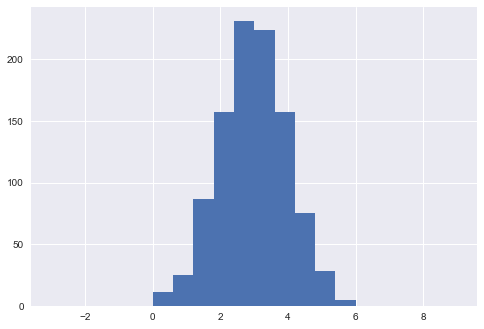

In [5]:
plt.hist(samples, bins=20, range=(-3.0, 9.0))
plt.show()

---

---

---

---